In [39]:
import json
import numpy as np
import os
from skimage.transform import resize
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load the model and specify paths and labelling:

In [4]:
# load the model 
model_path = '/Users/chenjialu/Desktop/DL_Assignment2/Experiment Result/VGG_Model2/vgg19_tl_model.h5'
model = load_model(model_path)
# specify the image shape
image_shape = (224, 224)

In [5]:
# get the mapping from prediction to actual label
with open('/Users/chenjialu/Desktop/DL_Assignment2/Experiment Result/VGG_Model2/label_map.json') as f:
    label_map = json.load(f)

In [6]:
# specify the folder of the test-set 
data_dir = '/Users/chenjialu/Desktop/DL_Assignment2/Assignment-2-Dataset-Round-1/vali-set/'

In [94]:
# the true labels
labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 
        'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
        'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
        'y', 'z']

## Get the predictions from the model:

In [8]:
# give the predicted and the gold label of one image with the image file name
def predict_image(filename, model):
    """
    A function get the predicted label of one image with the image file name
    """
    # get the prediction
    img_path = data_dir + filename 
    img = load_img(img_path, target_size=image_shape)  # this is a PIL image
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = label_map[str(pred.argmax(axis=-1)[0])]
    return pred

In [15]:
def write_prediction(output_path, data_dir, model):
    """
    Given a collection of images from an image folder,
    this function write the prediction file(follow the assignment submission format) 
    and return the predicted labels and gold labels of the images 
    """
    preds = []
    filenames = []
    with open(output_path, 'w') as f:
        # for each file in the 
        for filename in os.listdir(data_dir):
            pred = predict_image(filename, model)
            preds.append(pred)
            filenames.append(filename)
            print(filename, pred)
            f.write(filename+' '+pred+'\n')
    return preds, filenames

In [17]:
# get predictions
preds, filename = write_prediction('/Users/chenjialu/Desktop/text.txt', data_dir, model) 

img001-00017.png 0
img001-00024.png 0
img001-00026.png 0
img001-00028.png 0
img001-00044.png 0
img001-00048.png 0
img001-00061.png 0
img001-00067.png 0
img001-00093.png 0
img001-00094.png 0
img001-00103.png 0
img001-00104.png 50
img001-00114.png 24
img001-00133.png 24
img001-00134.png 0
img001-00151.png 24
img001-00180.png 0
img001-00190.png 24
img001-00200.png 0
img001-00210.png 0
img001-00214.png 50
img001-00218.png 24
img001-00221.png 0
img001-00237.png 24
img001-00245.png 0
img001-00252.png 0
img001-00266.png 0
img001-00287.png 0
img001-00293.png 24
img001-00302.png 50
img001-00308.png 0
img001-00310.png 0
img001-00312.png 50
img001-00313.png 0
img001-00318.png 0
img001-00319.png 0
img001-00346.png 0
img001-00360.png 50
img001-00366.png 0
img001-00369.png 0
img001-00375.png 0
img001-00377.png 24
img001-00386.png 0
img001-00399.png 24
img001-00402.png 0
img001-00409.png 0
img001-00446.png 0
img001-00447.png 0
img001-00449.png 0
img001-00462.png 0
img001-00463.png 24
img001-00464.png

img005-00214.png 4
img005-00230.png 4
img005-00238.png 4
img005-00240.png 4
img005-00258.png 4
img005-00270.png 4
img005-00272.png 4
img005-00296.png 4
img005-00298.png 4
img005-00299.png 4
img005-00308.png 4
img005-00333.png 4
img005-00353.png 4
img005-00370.png 4
img005-00372.png 4
img005-00383.png 4
img005-00385.png 4
img005-00397.png 4
img005-00410.png 4
img005-00411.png 4
img005-00415.png 4
img005-00429.png 4
img005-00470.png 4
img005-00482.png 4
img005-00498.png 4
img005-00505.png 4
img005-00507.png 4
img005-00516.png 4
img005-00527.png 4
img005-00528.png 4
img005-00544.png 4
img005-00545.png 4
img005-00546.png 4
img005-00555.png 4
img005-00562.png 4
img005-00582.png 4
img005-00587.png 4
img005-00607.png 4
img005-00614.png 4
img005-00623.png 4
img005-00626.png 4
img005-00634.png 4
img005-00636.png 4
img005-00653.png 4
img005-00685.png 4
img005-00709.png 4
img005-00710.png 4
img005-00729.png 4
img005-00737.png 4
img005-00768.png 4
img005-00771.png 4
img005-00773.png 4
img005-00776

img009-00596.png 8
img009-00602.png 8
img009-00604.png 8
img009-00616.png 8
img009-00617.png 8
img009-00622.png 8
img009-00643.png 8
img009-00659.png 8
img009-00661.png 8
img009-00665.png 8
img009-00668.png 8
img009-00681.png 8
img009-00698.png 8
img009-00701.png 8
img009-00747.png 8
img009-00750.png 8
img009-00755.png 8
img009-00764.png 8
img009-00768.png 8
img009-00770.png 8
img009-00783.png 8
img009-00784.png 8
img009-00788.png 8
img009-00801.png 8
img009-00818.png 8
img009-00824.png 8
img009-00836.png 8
img009-00841.png 8
img009-00860.png 8
img009-00869.png 8
img009-00895.png 8
img009-00911.png 8
img009-00945.png 8
img009-00949.png 8
img009-00951.png 8
img009-00955.png 8
img009-00957.png 8
img009-00960.png 8
img009-00968.png 8
img009-00970.png 8
img009-00976.png 8
img009-00982.png 8
img009-00989.png 8
img009-00999.png 8
img009-01006.png 8
img009-01011.png 8
img009-01016.png 8
img010-00035.png 9
img010-00036.png 9
img010-00041.png 9
img010-00053.png 9
img010-00056.png 9
img010-00060

img013-00751.png 12
img013-00775.png 12
img013-00777.png 38
img013-00778.png 38
img013-00780.png 38
img013-00784.png 12
img013-00786.png 38
img013-00793.png 12
img013-00795.png 12
img013-00798.png 12
img013-00822.png 12
img013-00833.png 12
img013-00839.png 12
img013-00845.png 12
img013-00860.png 38
img013-00862.png 38
img013-00891.png 12
img013-00892.png 38
img013-00907.png 12
img013-00927.png 12
img013-00936.png 38
img013-00948.png 38
img013-00959.png 12
img013-00962.png 12
img013-00969.png 12
img013-00970.png 38
img013-00973.png 38
img013-00975.png 38
img013-00976.png 38
img013-00983.png 12
img013-00986.png 12
img013-00999.png 12
img013-01007.png 12
img013-01013.png 12
img014-00007.png 13
img014-00035.png 13
img014-00037.png 13
img014-00054.png 13
img014-00058.png 13
img014-00084.png 13
img014-00105.png 13
img014-00118.png 13
img014-00122.png 13
img014-00126.png 13
img014-00128.png 13
img014-00129.png 13
img014-00132.png 13
img014-00135.png 13
img014-00153.png 13
img014-00163.png 13


img017-00728.png 16
img017-00738.png 16
img017-00741.png 16
img017-00748.png 16
img017-00759.png 16
img017-00768.png 16
img017-00778.png 16
img017-00784.png 16
img017-00788.png 16
img017-00796.png 16
img017-00805.png 16
img017-00806.png 26
img017-00817.png 16
img017-00874.png 16
img017-00889.png 16
img017-00906.png 16
img017-00907.png 16
img017-00926.png 16
img017-00939.png 16
img017-00951.png 16
img017-00958.png 16
img017-00961.png 16
img017-00974.png 16
img017-00983.png 16
img017-00984.png 16
img017-00987.png 16
img017-00996.png 16
img017-00997.png 16
img018-00002.png 17
img018-00003.png 17
img018-00036.png 17
img018-00037.png 17
img018-00047.png 17
img018-00053.png 17
img018-00072.png 17
img018-00081.png 17
img018-00084.png 17
img018-00101.png 17
img018-00103.png 17
img018-00111.png 17
img018-00124.png 17
img018-00140.png 17
img018-00141.png 17
img018-00143.png 17
img018-00149.png 17
img018-00155.png 17
img018-00159.png 17
img018-00172.png 17
img018-00173.png 17
img018-00192.png 17


img021-00824.png 20
img021-00839.png 20
img021-00843.png 20
img021-00856.png 20
img021-00857.png 20
img021-00884.png 20
img021-00888.png 20
img021-00895.png 20
img021-00896.png 20
img021-00904.png 20
img021-00920.png 20
img021-00928.png 20
img021-00930.png 20
img021-00941.png 20
img021-00977.png 20
img021-00984.png 20
img021-00991.png 20
img021-00996.png 20
img021-01000.png 20
img021-01001.png 20
img021-01006.png 20
img021-01016.png 20
img022-00001.png 21
img022-00006.png 21
img022-00009.png 47
img022-00019.png 21
img022-00033.png 21
img022-00035.png 21
img022-00052.png 21
img022-00053.png 21
img022-00058.png 21
img022-00062.png 21
img022-00066.png 21
img022-00067.png 21
img022-00072.png 21
img022-00079.png 21
img022-00084.png 21
img022-00102.png 21
img022-00113.png 21
img022-00116.png 21
img022-00117.png 21
img022-00127.png 21
img022-00136.png 21
img022-00145.png 21
img022-00188.png 21
img022-00230.png 21
img022-00259.png 21
img022-00292.png 21
img022-00298.png 21
img022-00302.png 21


img025-00879.png 24
img025-00930.png 0
img025-00940.png 24
img025-00955.png 24
img025-00960.png 24
img025-00962.png 24
img025-00963.png 24
img025-00968.png 24
img025-00970.png 24
img025-00979.png 0
img025-00989.png 24
img025-00999.png 24
img025-01005.png 24
img025-01009.png 24
img025-01011.png 24
img026-00002.png 25
img026-00004.png 25
img026-00022.png 25
img026-00033.png 25
img026-00035.png 25
img026-00037.png 25
img026-00063.png 25
img026-00065.png 25
img026-00104.png 25
img026-00108.png 25
img026-00130.png 25
img026-00134.png 25
img026-00147.png 25
img026-00157.png 25
img026-00160.png 25
img026-00178.png 25
img026-00191.png 51
img026-00194.png 25
img026-00200.png 25
img026-00207.png 25
img026-00213.png 25
img026-00217.png 25
img026-00233.png 25
img026-00252.png 25
img026-00255.png 25
img026-00276.png 25
img026-00277.png 25
img026-00289.png 25
img026-00290.png 25
img026-00297.png 25
img026-00300.png 25
img026-00304.png 25
img026-00307.png 25
img026-00314.png 25
img026-00321.png 25
im

img029-00930.png 28
img029-00932.png 54
img029-00937.png 28
img029-00952.png 28
img029-00955.png 28
img029-00958.png 28
img029-00985.png 28
img029-00993.png 28
img029-01010.png 28
img030-00005.png 29
img030-00011.png 55
img030-00013.png 29
img030-00024.png 29
img030-00056.png 29
img030-00069.png 29
img030-00072.png 29
img030-00076.png 29
img030-00119.png 29
img030-00127.png 29
img030-00135.png 29
img030-00140.png 29
img030-00173.png 29
img030-00174.png 29
img030-00181.png 29
img030-00182.png 29
img030-00196.png 29
img030-00210.png 29
img030-00218.png 29
img030-00220.png 29
img030-00225.png 29
img030-00231.png 29
img030-00255.png 29
img030-00284.png 29
img030-00315.png 29
img030-00336.png 29
img030-00343.png 29
img030-00357.png 29
img030-00360.png 29
img030-00365.png 29
img030-00370.png 29
img030-00372.png 29
img030-00406.png 29
img030-00409.png 29
img030-00411.png 29
img030-00423.png 29
img030-00425.png 29
img030-00445.png 29
img030-00464.png 29
img030-00474.png 29
img030-00475.png 29


img033-00992.png 32
img033-01006.png 58
img033-01012.png 32
img034-00006.png 33
img034-00026.png 59
img034-00030.png 33
img034-00052.png 33
img034-00058.png 33
img034-00073.png 59
img034-00081.png 59
img034-00100.png 33
img034-00103.png 59
img034-00114.png 33
img034-00122.png 33
img034-00126.png 59
img034-00153.png 33
img034-00163.png 33
img034-00187.png 59
img034-00191.png 59
img034-00201.png 33
img034-00202.png 33
img034-00209.png 33
img034-00212.png 33
img034-00218.png 59
img034-00247.png 33
img034-00255.png 33
img034-00277.png 33
img034-00283.png 33
img034-00285.png 33
img034-00290.png 33
img034-00291.png 33
img034-00330.png 33
img034-00332.png 33
img034-00334.png 33
img034-00339.png 33
img034-00362.png 59
img034-00373.png 33
img034-00380.png 33
img034-00382.png 33
img034-00403.png 33
img034-00405.png 59
img034-00410.png 33
img034-00436.png 59
img034-00453.png 33
img034-00466.png 33
img034-00468.png 33
img034-00476.png 33
img034-00478.png 33
img034-00493.png 33
img034-00494.png 33


img038-00031.png 37
img038-00043.png 37
img038-00077.png 37
img038-00084.png 37
img038-00101.png 37
img038-00110.png 37
img038-00116.png 37
img038-00166.png 37
img038-00170.png 37
img038-00184.png 37
img038-00185.png 37
img038-00200.png 37
img038-00203.png 37
img038-00204.png 37
img038-00218.png 37
img038-00224.png 37
img038-00240.png 11
img038-00254.png 37
img038-00259.png 37
img038-00275.png 37
img038-00278.png 37
img038-00295.png 37
img038-00300.png 37
img038-00305.png 37
img038-00308.png 37
img038-00314.png 37
img038-00315.png 37
img038-00327.png 37
img038-00330.png 37
img038-00331.png 37
img038-00333.png 37
img038-00338.png 11
img038-00345.png 37
img038-00348.png 37
img038-00353.png 37
img038-00374.png 37
img038-00375.png 37
img038-00379.png 37
img038-00380.png 37
img038-00461.png 37
img038-00464.png 37
img038-00467.png 37
img038-00469.png 37
img038-00472.png 37
img038-00475.png 37
img038-00489.png 37
img038-00493.png 37
img038-00496.png 37
img038-00503.png 37
img038-00508.png 37


img042-00075.png 41
img042-00085.png 41
img042-00089.png 41
img042-00102.png 41
img042-00108.png 41
img042-00112.png 41
img042-00122.png 41
img042-00124.png 41
img042-00129.png 41
img042-00134.png 41
img042-00166.png 41
img042-00171.png 41
img042-00180.png 41
img042-00200.png 41
img042-00201.png 41
img042-00215.png 41
img042-00234.png 41
img042-00243.png 41
img042-00258.png 41
img042-00260.png 41
img042-00279.png 41
img042-00302.png 15
img042-00305.png 41
img042-00347.png 41
img042-00353.png 41
img042-00361.png 41
img042-00375.png 41
img042-00388.png 41
img042-00390.png 41
img042-00401.png 41
img042-00407.png 41
img042-00411.png 41
img042-00418.png 41
img042-00435.png 15
img042-00438.png 41
img042-00453.png 41
img042-00464.png 41
img042-00469.png 41
img042-00473.png 41
img042-00474.png 41
img042-00475.png 41
img042-00487.png 41
img042-00491.png 41
img042-00496.png 41
img042-00507.png 41
img042-00522.png 41
img042-00543.png 41
img042-00547.png 41
img042-00555.png 41
img042-00564.png 41


img046-00176.png 45
img046-00177.png 45
img046-00178.png 45
img046-00180.png 45
img046-00210.png 45
img046-00212.png 45
img046-00219.png 45
img046-00247.png 45
img046-00264.png 45
img046-00270.png 45
img046-00272.png 45
img046-00274.png 45
img046-00278.png 45
img046-00282.png 45
img046-00309.png 45
img046-00314.png 45
img046-00343.png 45
img046-00349.png 45
img046-00358.png 45
img046-00366.png 45
img046-00368.png 45
img046-00382.png 45
img046-00385.png 45
img046-00397.png 45
img046-00400.png 45
img046-00419.png 45
img046-00424.png 45
img046-00427.png 45
img046-00450.png 45
img046-00461.png 45
img046-00473.png 45
img046-00474.png 45
img046-00476.png 45
img046-00484.png 45
img046-00488.png 45
img046-00509.png 45
img046-00515.png 45
img046-00517.png 45
img046-00528.png 45
img046-00534.png 45
img046-00535.png 45
img046-00544.png 45
img046-00545.png 45
img046-00555.png 45
img046-00559.png 45
img046-00560.png 45
img046-00564.png 45
img046-00586.png 45
img046-00589.png 45
img046-00604.png 45


img050-00221.png 49
img050-00234.png 49
img050-00241.png 49
img050-00244.png 49
img050-00250.png 49
img050-00264.png 49
img050-00279.png 49
img050-00283.png 49
img050-00292.png 49
img050-00298.png 49
img050-00332.png 49
img050-00342.png 49
img050-00346.png 49
img050-00350.png 49
img050-00351.png 49
img050-00357.png 49
img050-00370.png 49
img050-00371.png 49
img050-00387.png 49
img050-00391.png 49
img050-00413.png 49
img050-00421.png 49
img050-00430.png 49
img050-00446.png 49
img050-00462.png 49
img050-00464.png 49
img050-00465.png 49
img050-00466.png 49
img050-00483.png 49
img050-00507.png 49
img050-00525.png 49
img050-00533.png 49
img050-00534.png 49
img050-00539.png 49
img050-00560.png 49
img050-00574.png 49
img050-00575.png 49
img050-00592.png 49
img050-00593.png 49
img050-00598.png 49
img050-00605.png 49
img050-00637.png 49
img050-00651.png 49
img050-00654.png 49
img050-00661.png 49
img050-00679.png 49
img050-00689.png 49
img050-00708.png 49
img050-00709.png 49
img050-00721.png 49


img054-00287.png 53
img054-00298.png 53
img054-00317.png 53
img054-00344.png 53
img054-00346.png 53
img054-00380.png 53
img054-00386.png 53
img054-00399.png 53
img054-00422.png 53
img054-00434.png 27
img054-00462.png 53
img054-00478.png 53
img054-00496.png 53
img054-00503.png 53
img054-00517.png 53
img054-00523.png 53
img054-00524.png 53
img054-00527.png 53
img054-00537.png 53
img054-00541.png 53
img054-00551.png 53
img054-00566.png 53
img054-00570.png 53
img054-00571.png 53
img054-00593.png 53
img054-00615.png 53
img054-00631.png 53
img054-00639.png 53
img054-00673.png 53
img054-00674.png 53
img054-00676.png 53
img054-00683.png 53
img054-00687.png 53
img054-00689.png 53
img054-00706.png 53
img054-00719.png 53
img054-00723.png 53
img054-00729.png 53
img054-00732.png 53
img054-00739.png 53
img054-00741.png 53
img054-00760.png 53
img054-00761.png 53
img054-00766.png 53
img054-00776.png 53
img054-00780.png 53
img054-00794.png 53
img054-00810.png 53
img054-00813.png 53
img054-00821.png 53


img058-00351.png 57
img058-00368.png 57
img058-00373.png 57
img058-00377.png 57
img058-00383.png 57
img058-00385.png 57
img058-00428.png 57
img058-00432.png 57
img058-00444.png 57
img058-00450.png 57
img058-00473.png 57
img058-00480.png 57
img058-00493.png 57
img058-00503.png 57
img058-00505.png 31
img058-00520.png 57
img058-00524.png 57
img058-00540.png 57
img058-00547.png 57
img058-00549.png 57
img058-00550.png 57
img058-00557.png 57
img058-00560.png 57
img058-00568.png 57
img058-00569.png 57
img058-00577.png 57
img058-00597.png 57
img058-00638.png 57
img058-00651.png 57
img058-00659.png 31
img058-00666.png 57
img058-00669.png 57
img058-00675.png 57
img058-00679.png 57
img058-00687.png 57
img058-00697.png 57
img058-00699.png 57
img058-00714.png 57
img058-00727.png 57
img058-00731.png 57
img058-00739.png 57
img058-00742.png 57
img058-00754.png 57
img058-00756.png 57
img058-00769.png 57
img058-00780.png 57
img058-00782.png 57
img058-00804.png 57
img058-00820.png 31
img058-00835.png 57


img062-00406.png 61
img062-00460.png 61
img062-00464.png 61
img062-00465.png 61
img062-00489.png 35
img062-00493.png 61
img062-00495.png 61
img062-00499.png 35
img062-00510.png 61
img062-00533.png 61
img062-00536.png 61
img062-00539.png 35
img062-00543.png 35
img062-00548.png 61
img062-00550.png 61
img062-00556.png 61
img062-00557.png 35
img062-00566.png 61
img062-00578.png 61
img062-00601.png 61
img062-00602.png 61
img062-00611.png 61
img062-00624.png 61
img062-00634.png 61
img062-00640.png 61
img062-00644.png 61
img062-00654.png 61
img062-00661.png 61
img062-00673.png 61
img062-00675.png 61
img062-00688.png 61
img062-00703.png 61
img062-00713.png 61
img062-00722.png 61
img062-00724.png 61
img062-00763.png 35
img062-00767.png 61
img062-00775.png 61
img062-00778.png 61
img062-00789.png 61
img062-00798.png 61
img062-00829.png 61
img062-00832.png 35
img062-00835.png 61
img062-00853.png 35
img062-00862.png 61
img062-00864.png 35
img062-00866.png 61
img062-00876.png 35
img062-00889.png 61


In [97]:
predictions = DataFrame({'filename':filename,
                         'pred':preds})
predictions.head()

,filename,pred
0,img001-00568.png,0
1,img001-00360.png,0
2,img001-00151.png,0
3,img001-00017.png,0
4,img001-00648.png,0


## Get the actual labels: 

In [98]:
filename = []
gold =[]
with open('/Users/chenjialu/Desktop/DL_Assignment2/Assignment-2-Dataset-Round-1/vali.txt', 'r') as f:
    for i, line in enumerate(f):
        line = line.strip('\n').split(' ')
        filename.append(line[0])
        gold.append(line[1])    

In [99]:
golds = DataFrame({'filename':filename,
                         'gold':gold})
golds.head()

,filename,gold
0,img001-00568.png,0
1,img001-00360.png,0
2,img001-00151.png,0
3,img001-00017.png,0
4,img001-00648.png,0


In [100]:
predictions = predictions.join(golds, lsuffix='_caller', rsuffix='_other' )
predictions.head()

,filename_caller,pred,filename_other,gold
0,img001-00568.png,0,img001-00568.png,0
1,img001-00360.png,0,img001-00360.png,0
2,img001-00151.png,0,img001-00151.png,0
3,img001-00017.png,0,img001-00017.png,0
4,img001-00648.png,0,img001-00648.png,0


In [101]:
# replace label name 
for i, row in predictions.iterrows():
    predictions.loc[i, "pred"] = labels[int(row["pred"])]
    predictions.loc[i, "gold"] = labels[int(row["gold"])]

In [102]:
predictions

,filename_caller,pred,filename_other,gold
0,img001-00568.png,0,img001-00568.png,0
1,img001-00360.png,0,img001-00360.png,0
2,img001-00151.png,0,img001-00151.png,0
3,img001-00017.png,0,img001-00017.png,0
4,img001-00648.png,0,img001-00648.png,0
5,img001-00103.png,0,img001-00103.png,0
6,img001-00221.png,0,img001-00221.png,0
7,img001-00210.png,0,img001-00210.png,0
8,img001-00293.png,0,img001-00293.png,0
9,img001-00954.png,0,img001-00954.png,0


## Analyse the prediction results:

### The overall accuray:

In [103]:
np.sum(predictions["gold"] == predictions["pred"])/len(predictions)

0.9257425742574258

### Build a function to produce the classification report:

In [104]:
from collections import defaultdict
import numpy as np
from sklearn.metrics import confusion_matrix
def report2dict(cr):
    """A function to convert a classification report to dictionary"""
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]     
        if len(parsed_row) > 0:
            parsed_row[0] = parsed_row[0].strip()
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return D_class_data

def get_cr(gold, pred):
    """A function to get a classification report data frame from prediction"""
    cr = pd.DataFrame(report2dict(classification_report(gold, pred))).T
    cr = cr[cr.index != 'avg / total']
    # add accuracy
    cmat = confusion_matrix(gold, pred)
    accuracy = cmat.diagonal()/cmat.sum(axis=1)
    accuracy = np.around(accuracy, 2)
    cr["accuracy"] = accuracy    
    return cr
    

### The classification report:

In [107]:
cr = get_cr(predictions["gold"], predictions["pred"])
cr.to_csv("/Users/chenjialu/Desktop/classifiaction_Report.csv")
cr.describe()

,f1-score,precision,recall,support,accuracy
count,62.000000,62.000000,62.000000,62.0,62.000000
mean,0.927258,0.927097,0.925000,101.0,0.925000
std,0.079014,0.081611,0.083818,0.0,0.083818
min,0.660000,0.620000,0.700000,101.0,0.700000
25%,0.860000,0.880000,0.890000,101.0,0.890000
50%,0.960000,0.960000,0.960000,101.0,0.960000
75%,0.980000,0.980000,0.980000,101.0,0.980000
max,1.000000,1.000000,1.000000,101.0,1.000000


In [108]:
cr

,f1-score,precision,recall,support,accuracy
0,0.76,0.79,0.72,101.0,0.72
1,0.96,0.96,0.96,101.0,0.96
2,1.00,1.00,1.00,101.0,1.00
3,1.00,1.00,1.00,101.0,1.00
4,1.00,0.99,1.00,101.0,1.00
5,1.00,1.00,1.00,101.0,1.00
6,1.00,1.00,1.00,101.0,1.00
7,1.00,1.00,1.00,101.0,1.00
8,1.00,1.00,1.00,101.0,1.00
9,0.98,1.00,0.97,101.0,0.97


### The confusion matrix:

array([[ 73,   0,   0, ...,   0,   0,   0],
       [  0,  97,   0, ...,   0,   0,   0],
       [  0,   0, 101, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  89,   0,   0],
       [  0,   0,   0, ...,   0,  98,   0],
       [  0,   0,   0, ...,   0,   0,  82]])

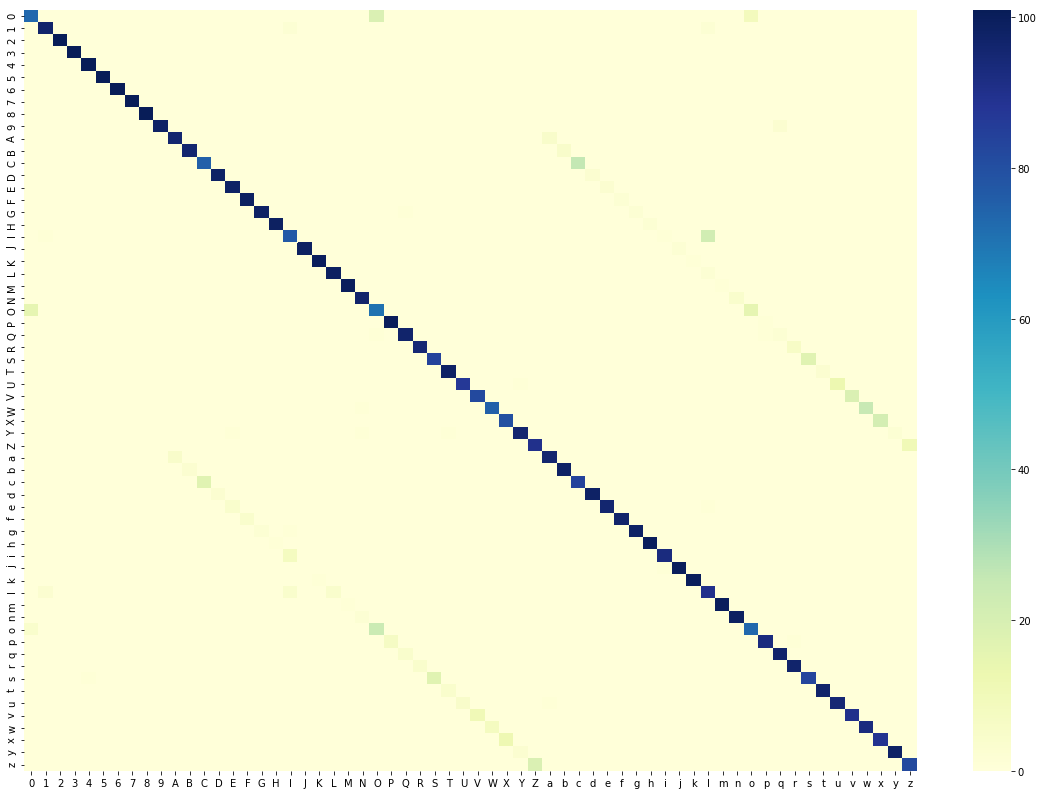

In [117]:
import seaborn as sn
import matplotlib.pyplot as plt
cm_map = confusion_matrix(predictions["gold"], predictions["pred"])

df_cm = pd.DataFrame(cm_map, index = labels,
                  columns = labels)
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, cmap="YlGnBu")